Introduction 
===

In this notebook we will study the different discrete approximations of curvatures in idealised experiments modelled using the Young-Laplace equation in capillarly rise and a coarsely discretised droplets. 

##### In particular we will demonstrate how the exact analytical solution can be recovered from the discrete estimates while simultaneously providing a formula for computing numerical errors in non-ideal surfaces (a new result within the field of discrete differential geometry (usually only concerend with the flow) and with surface tension coupling models in CFD frameworks respectively). These relations can then be used to simulate larger scale systems and allows for us to compute the error propogations under a particular refinement of the mesh.


The idealised geometry of the problem allows for a more exact study of numerical errors by comparisons to the solution from the predefined geometry. Consider the Gauss-Bonnet Theorem which provides a precise relation for the total integrated cuvature ($K$) of any surface $\mathcal{M}$
$$\int_\mathcal{M} K d A+\int_{\partial \mathcal{M}} k_{g} d s=2 \pi \chi$$


In the computational setting we have the discrete Gauss-Bonnet Theorem, which also holds for any (triangulable) surface and allows us to sum over vertices, rather than integrating the smooth manifold for which we usually do not have an exact representation:

$$\sum_{i \in \mathrm{int} V} \Omega_{i}+\sum_{i \in \partial V} \kappa_{i}=2 \pi \chi$$


where the boundary vertices are
$$\kappa_{i}:=\pi-\sum_{i j k} \theta_{i}^{j k}$$


Here the angle defect $\Omega_{i}$ is analogous, but not exact, to the Gaussian curvature $K$ as discussed below. When there is no boundary (such as in an idealised droplet suspended in space) the equation reduces to

$$\sum_{i \in \mathrm{int} V} \Omega_{i}=2 \pi \chi$$


The Young-Laplace equation has an exact analytical solution $\Delta p$, related to the radius of the oscullating circle $R$:

$$
\Delta p=-\gamma H_{f}=-\gamma\left(\frac{1}{R_{1}}+\frac{1}{R_{2}}\right)=\frac{2 \gamma}{R}
$$

The relation between Gaussian curvature $K$ and mean curvature $H$ is discussed below.

- In the droplet case study we have $H_{f} = \frac{2}{r}$ where $r$ is the radius of the droplet
- In the capillary rise case study we have $H_{f} = -\frac{2 \cos(\theta)}{r}$ where $r$ is the radius of the tube and $\theta$ is the three-phase contact angle on tube surface.


The purpose of this study is thus to find discretised approximiations of $H_{f} = \frac{2}{R}$ in order to provide insights into how we can compute numerical accuracies when simulating non-ideal systems. 

- In the droplet case study we vary $r$, the radius of the droplet, we demonstrate the invariance of the approximation with the (integrated) dual contact area as we refine the droplet to have more sampling points.
- In the capillary rise case study we vary $\theta$, three-phase contact angle on tube surface, values closer to $\theta = \frac{\pi}{2} = 90^{\circ}$ have less curvature (precisely zero at $\theta = 90^{\circ}$). We demonstrate how we can recover the exact curvature value for any $\theta$ and our uncertainty cost when doing so.

Mathematically these relations hold for any surface with or without boundary through the Gauss-Bonnet Theorem. For any given refinement on a non-ideal surface the local star domain of the vertex is simply a surface with boundary. In other words we demand that the physics computed by the curvature be exactly represented in exchange for adding numerical uncertainty over time; where the uncertainty is high we can refine the mesh/triangulation before a time step is taken in a full simulation.

---

## Nomenclature

We use the following nomenclature and conventions throughout (from the course notes of Keenan Crane (https://brickisland.net/DDGSpring2020) (CC 4.0))


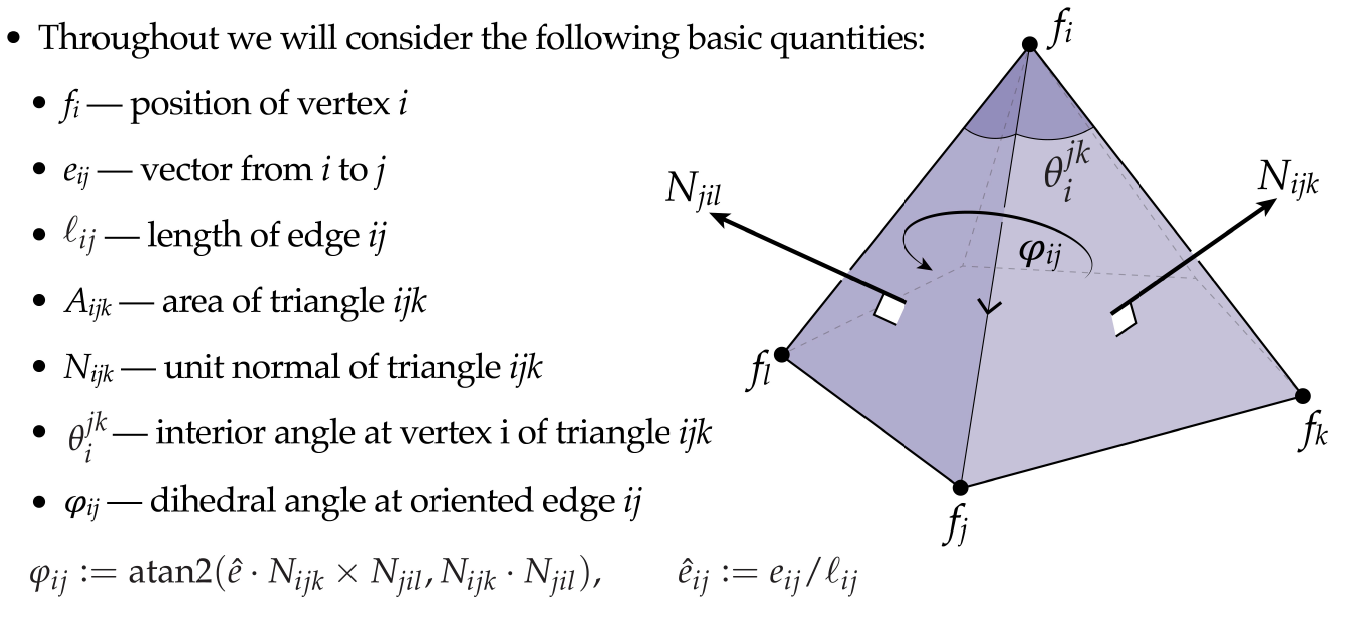

From the same notes the following overview of all discrete approximations and their relation to the smooth curvature definitions is also provided:

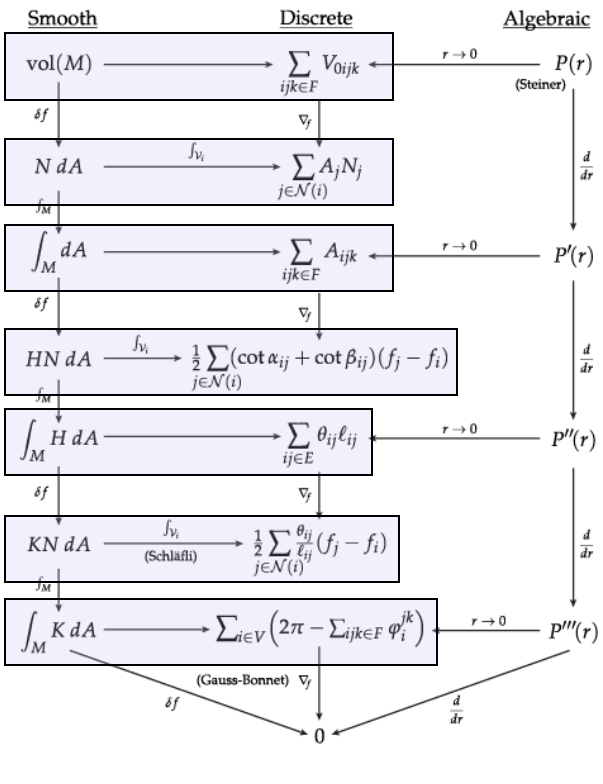


### We consider the following definitions for *vector curvatures*:

Gaussian normal curvature: $$\mathrm{KNdA} = \frac{1}{2} \sum_{i j \in \mathrm{St}(i)} \frac{\varphi_{i j}}{\ell_{i j}}\left(f_{j}-f_{i}\right)$$
Mean normal curvature: $$H N dA = \frac{1}{2} \sum_{i j \in \mathrm{St}(i)}\left(\cot \alpha_{i j}+\cot \beta_{i j}\right)\left(f_{i}-f_{j}\right)$$
Area: $$N d A = \frac{1}{6} \sum_{i j k \in \mathrm{St}(i)} f_{j} \times f_{k}$$
Volume: (No Hodge dual in $\mathbb{R}^3$; scalar values only)


### ...and the following definitions for *scalar curvatures*:

Gaussian curvature (angle defect): $$ \Omega_{i}:=2 \pi-\sum_{i j k} \theta_{i}^{j k}$$
Mean curvature: $$H_{i j}:=\frac{1}{2} \ell_{i j} \varphi_{i j}$$
Area: $$A_{i j k}$$
Volume: $$V_{i j k}$$

### The Gaussian and mean curvatures are related to each other through the principle curvatures:

Gaussian: $K=\kappa_{1} \kappa_{2}$

Mean: $H=\frac{\kappa_{1}+\kappa_{2}}{2}$

Since we know that $\kappa_{1} = \kappa_{2} $ we have $K=\kappa_{1}^2$ so 

$$
H=\frac{\sqrt{K}+\sqrt{K}}{2}
$$

The principle curvatures in the smooth setting are defined by:

$$
\begin{array}{l}
\kappa_{1}=H-\sqrt{H^{2}-K} \\
\kappa_{2}=H+\sqrt{H^{2}-K}
\end{array}
$$

The discrete principle curvatures can be found from

$$\frac{H_{i}}{A_{i}} \pm \sqrt{\left(\frac{H_{i}}{A_{i}}\right)^{2}-\frac{K_{i}}{A_{i}}}$$

Where the vertex normal curvature $H_{i}:=\frac{1}{4} \sum_{i j \in E} \ell_{i j} \varphi_{i j}$ is normalized over the area of the dual cell $A_{i}:=\left|C_{i}\right|$:


### ...finally the algebraic perpective allows us to compute curvatures from the Steiner polynomials (of a mollified surface):

$$
\text { volume }_{\varepsilon}(f)=V_{0}+\varepsilon \sum_{i j k \in F} A_{i j k}+\varepsilon^{2} \sum_{i j \in E} \ell_{i j} \varphi_{i j}+\varepsilon^{3} \sum_{i \in V} \Omega_{i}
$$

$$
\begin{array}{l}
\frac{d}{d \varepsilon} \text { volume }_{\varepsilon}=\text { area }_{\varepsilon} \\
\frac{d}{d \varepsilon} \text { area }_{\varepsilon}=\operatorname{mean}_{\varepsilon} \\
\frac{d}{d \varepsilon} \operatorname{mean}_{\varepsilon}=\text { Gauss }_{\varepsilon} \\
\frac{d}{d \varepsilon} \text { Gauss }_{\varepsilon}=0
\end{array}
$$

# Other notes:

#### Notes on the angle defect in the plane:

An equality that holds only when there is no curvature

$$2 \pi-\sum_{i} \theta_{i}=\frac{1}{6} \pi \varepsilon^{2} K$$

which was derived from the relation of ratios between spheres/balls of radius $\varepsilon$:

$$\frac{\varepsilon^{2}}{12} K \approx 1-\frac{\left|B_{g}(\varepsilon)\right|}{\left|B_{\mathbb{R}^{2}}(\varepsilon)\right|}$$

so that demonstrates how this equality is the integrated Gaussian curvature and this integral is the same for slight variations of $\varepsilon$. In the future we will study if it is possible to recover exact rations for different values of $\varepsilon$ by studying how exactly the area ratios vary. 

In the Extrinsic viewpoint the angle defect $\Omega$ becomes the integrated area on the unit sphere, the shaded are shown in this figure:


First we consider the capillary-rise experiments to demonstrate the local deviation of discrete curvatures from the exact smooth solution:
---

In [2]:
# Imports and physical parameters
import numpy as np
import scipy
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
%matplotlib notebook

# Parameters for a water-filled glass tube in air at standard laboratory conditions,
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

from ddgclib import *
#from ddgclib.curvatures import plot_surface, curvature

NOTE: You can plot any of the variables computed above by adding the keys from "c_outd"  using the plot_variables function
Help on function plot_variables in module ddgclib._curvatures:

plot_variables(X, vdict, xlabel='Contact angle $\\theta$', ylabel='-')

c_outd has the following values (see nomenclature above):
c_outd.keys() = dict_keys(['F', 'nn', 'n_i', 'E_ij', 'E_jk', 'E_ik', 'hat_E_ij', 'L_ij', 'Varphi_ij', 'mdp_ij', 'mdp_ik', 'j_k', 'j_l', 'Theta_i_jk', 'Wedge_ij_ik', 'A_ijk', 'N_ijk', 'N_ijl', 'C_ijk', 'KNdA_ij', 'HNdA_ij', 'NdA_ij', 'H_ij', 'V_ijk', 'i', 'j', 'k', 'l', 'wedge_ij_ik', 'a_ijk', 'n_ijk', 'wedge_ij_il', 'a_ijl', 'n_ijl', 'arg1', 'arg2', 'varphi_ij', 'c', 'a', 'b', 'alpha_ij', 'beta_ij', 'theta_i_jk', 'A', 'v_dual', 'h_ij', 'b_ij', 'C_ij', 'h_ik', 'b_ik', 'C_ik', 'KNdA_i', 'HNdA_i', 'NdA_i', 'Omega_i', 'K', 'H_i', 'H_ij_sum', 'K_f', 'H_f'])


<IPython.core.display.Javascript object>


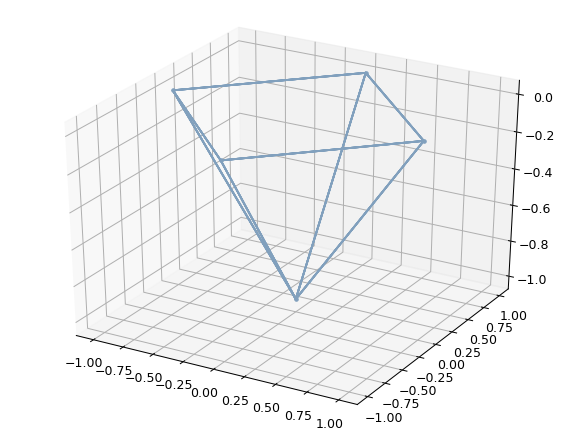

<IPython.core.display.Javascript object>


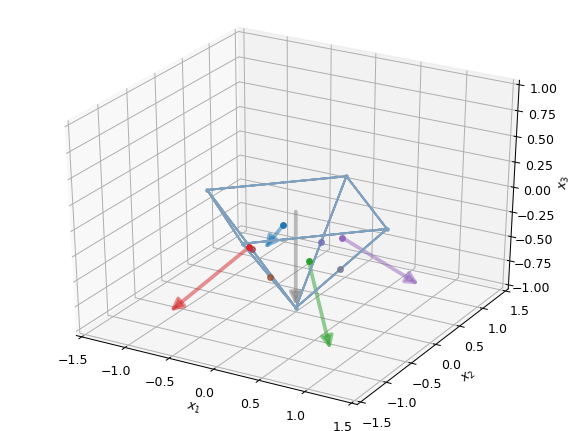

In [165]:
# Example calculation with the minimum discretisation
r = 1
THETA = np.linspace(0, np.pi)

H_i = []
H_ij_sum = []
K = []
K_f = []
H_f = []
HNdA_ij_sum = []
c_outd_list = []

for theta in THETA:
    # Compute discrete curvatures
    F, nn, K_f_theta, H_f_theta = cap_rise_init(r, theta, gamma, boundary_vertices=4, refinement=0)
    
    # Save results
    K_f.append(K_f_theta)
    H_f.append(H_f_theta)
    c_outd = curvatures(F, nn)
    c_outd['K_f'] = K_f
    c_outd['H_f'] = H_f
    H_i.append(c_outd['H_i'])
    H_ij_sum.append(c_outd['H_ij_sum'])
    HNdA_ij_sum.append(np.sum(c_outd['HNdA_ij']))
    K.append(c_outd['K'])    
    c_outd_list.append(c_outd)

H_i = np.array(H_i)
H_ij_sum = np.array(H_ij_sum)
# Exact hydrostatics
dp_exact = H_f_theta * gamma
X = THETA*180/np.pi
print(f'NOTE: You can plot any of the variables computed above by adding the keys from "c_outd"  using the plot_variables function')
help(plot_variables)

print(f'c_outd has the following values (see nomenclature above):')
print(f'c_outd.keys() = {c_outd.keys()}')

# At any `theta` and `r` the current local surface can be plotted using the plot_surface function as follows:
fig, axes, HC = plot_surface(F, nn)

# And the surface normals can be plotted with:
Plot_complex_normals(c_outd, F, nn)

### Discussion

#### First, let's plot some of the scalar curvatures over a range of contact angles $\theta$ and compare them to the exact Gaussian ($K_f$) and exact Mean ($H_f$) curvature. It is important to note that the errors for the discrete Gaussian $K$ and the discrete Mean ($H$) curvatures are already low close to $\theta$ as expected. We have reversed the sign of the concave cuvatures so that the symmetry is clear 

<IPython.core.display.Javascript object>


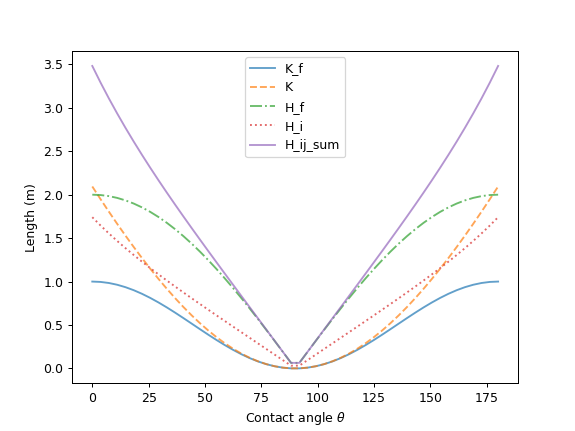

In [166]:
vdict = {'K_f': K_f,
         'K': K,
         'H_f': H_f,
         'H_i': H_i,
         'H_ij_sum': H_ij_sum
         }
plot_variables(X, vdict, ylabel='Length (m)', xlabel=r'Contact angle $\theta$')

The meaning of discrete mean curvature edge curvatures $H_{ij}$ (for any non-ideal surface) is exactly the integral of the true analytical curvature over the dual cell area $C_{ijk}$, our error confidence is known from the normalized values back over the full approximated area of the star domain $A_{ijk}$:

<IPython.core.display.Javascript object>


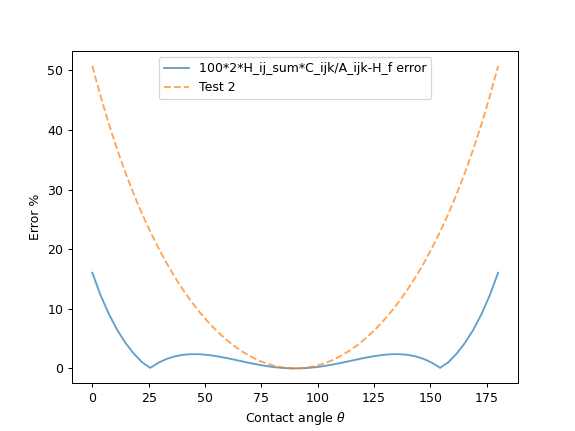

In [167]:
A_ijk = []
C_ijk = []
for c_outd in c_outd_list:
    A_ijk.append(np.sum(c_outd['A_ijk']))
    C_ijk.append(np.sum(c_outd['C_ijk']))
    
vdict = {'100*2*H_ij_sum*C_ijk/A_ijk-H_f error':100*abs(2*np.array(H_ij_sum)*np.array(C_ijk)/A_ijk-H_f)/np.abs(H_f),
        # 'Test': 100*abs((np.array(H_ij_sum) /H_f) /np.array(C_ijk) -H_f)/np.abs(H_f)
          'Test 2': 100*abs((np.array(H_ij_sum)) /np.array(C_ijk) -H_f)/np.abs(H_f)
        }
plot_variables(X, vdict, ylabel='Error %')

The vertex scalar mean curvature $H_{i}$ value can be directly used in dynamic computations (since it's local area is always known by computing the area of the star domain around $i$)

-1.1547005383792526
-1.1292206115212755
-1.102090655912392
-1.073243007161676
-1.0426111165072725
-1.0101307232713095
-0.9757412201947031
-0.9393872169959717
-0.9010202998511733
-0.8606009744062706
-0.8181007673088677
-0.7735044462070165
-0.7268123011434294
-0.6780424121013742
-0.627232809410721
-0.5744434175338953
-0.5197576605478812
-0.46328360177348826
-0.40515449278752697
-0.34552862038971754
-0.28458836505877994
-0.2225384208664893
-0.15960317305040742
-0.09602328220133044
-0.032051578629252675
0.032051578629252675
0.09602328220133044
0.1596031730504057
0.2225384208664893
0.28458836505877994
0.34552862038971754
0.4051544927875261
0.46328360177348826
0.5197576605478808
0.574443417533895
0.627232809410721
0.6780424121013742
0.7268123011434294
0.7735044462070159
0.818100767308868
0.8606009744062711
0.9010202998511733
0.9393872169959717
0.9757412201947033
1.01013072327131
1.0426111165072722
1.0732430071616763
1.1020906559123917
1.1292206115212753
1.1547005383792524


<IPython.core.display.Javascript object>


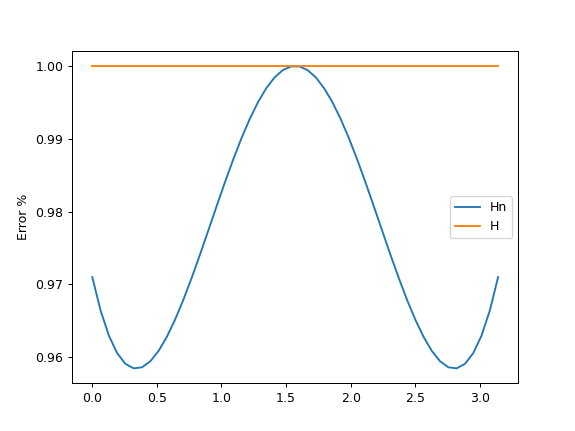

Text(0, 0.5, 'Error %')

In [168]:
r = 1  # 1 mm radius of tube
THETA = np.linspace(0, np.pi)  # (radian, angle from 0 to 180 deg)
Hlist = []
Hnlist = []
for theta in THETA:
    R = r / np.cos(theta)  # = R at theta = 0
    H_f = 1/R + 1/R
    # Let the reference vertex have a function value of zero
    y = R - R*np.sin(theta)#/2  This is the height of the boundary contact above the meniscus in m
    alpha_j = np.pi/4  # 45 degrees (square)
    beta_j = np.pi/4  # 45 degrees (square)
    # Area of rectangle plane (from pathagorean theorom)
    Area_rec = (np.sqrt(r**2 + r**2))**2  # edge = np.sqrt(R**2 + R**2)
    Area_plane = Area_rec
    y = R - R*np.sin(theta)
    theta_z = np.arctan(y/r)
    z = y / np.sin(theta_z)
    pij = y #z  # = p_j - p_i
    a, b = z, z 
    c = np.sqrt(r**2 + r**2)
    s = (a + b + c)/2
    Area_triangle = np.sqrt(s*(s - a)*(s - b)*(s - c))
    Area_rec = Area_triangle * 4    # 4 in triangles in the lower triangulation
    d = (-a**2 + b**2 + c**2)/(2*c)
    h = np.sqrt(b**2 - d**2)
    alpha_j = np.arcsin(h/z)
    beta_j = alpha_j
    # Cotan forumla:
    lap_j = ((cotan(alpha_j) + cotan(beta_j)) * -pij)
    print(lap_j )
    H = 0.5 * (4 * lap_j)  # Mean cuvature change at bottom vertex
    Hn =   H / (np.sqrt(np.array(z/r))) /r**2
    Hnlist.append(-Hn/H_f)
    
    H =   H / r**2
    Hlist.append(-H/H_f)
    
from matplotlib import pyplot as plot
plot.figure()
plot.plot(THETA, np.array(Hnlist), label='Hn')
plot.plot(THETA, np.array(Hlist)/C_ijk, label='H')
plot.legend()
plot.ylabel('Error %')

<IPython.core.display.Javascript object>


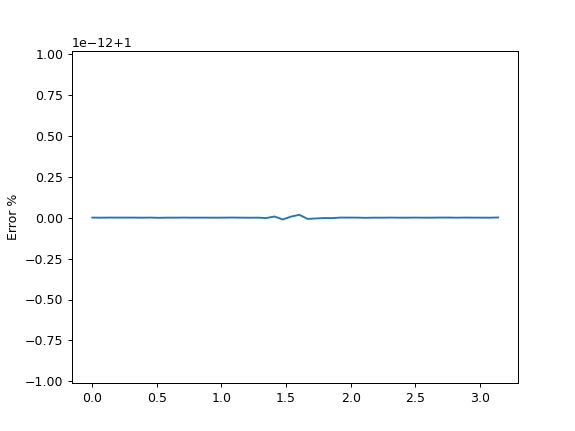

Text(0, 0.5, 'Error %')

In [171]:
THETA = np.linspace(0, np.pi)  # (radian, angle from 0 to 180 deg)
Hlist = []
Hnlist = []
r = 6  # mm radius of tube
for theta in THETA:
    R = r / np.cos(theta)  # = R at theta = 0
    H_f = 1/R + 1/R
    # Let the reference vertex have a function value of zero
    y = R - R*np.sin(theta)#/2  This is the height of the boundary contact above the meniscus in m
    alpha_j = np.pi/4  # 45 degrees (square)
    beta_j = np.pi/4  # 45 degrees (square)
    # Area of rectangle plane (from pathagorean theorom)
    Area_rec = (np.sqrt(r**2 + r**2))**2  # edge = np.sqrt(R**2 + R**2)
    Area_plane = Area_rec
    y = R - R*np.sin(theta)
    theta_z = np.arctan(y/r)
    z = y / np.sin(theta_z)
    pij = y #z  # = p_j - p_i
    a, b = z, z 
    c = np.sqrt(r**2 + r**2)
    s = (a + b + c)/2
    Area_triangle = np.sqrt(s*(s - a)*(s - b)*(s - c))
    Area_rec = Area_triangle * 4    # 4 in triangles in the lower triangulation
    d = (-a**2 + b**2 + c**2)/(2*c)
    h = np.sqrt(b**2 - d**2)
    alpha_j = np.arcsin(h/z)
    beta_j = alpha_j
    # Cotan forumla:
    lap_j = ((cotan(alpha_j) + cotan(beta_j)) * -pij)
    H = 0.5 * (4 * lap_j)  # Mean cuvature change at bottom vertex
    #Hn =   H / (np.sqrt(np.array(z/r))) /r**2
    # NOTE 20.01: This works because C_ikl = r**2 ?:
    Hn =   H / r**2
    Hnlist.append(-Hn/H_f)
    #Hlist.append(-H/H_f)  # Off by a factor of r**2
    
from matplotlib import pyplot as plot
plot.figure()
plot.plot(THETA, np.array(Hnlist)/C_ijk)
#plot.plot(THETA, np.array(Hlist)/C_ijk)
plot.ylabel('Error %')

# Droplet case study and plane projection

Here we focus on quantfiying the total refinement error rather than the local error. First demonstrate the projection of our plane refinement to the surface of the sphere. Then we demonstrate how we can take any vertex and repeat the analysis above using our curvature function.

<IPython.core.display.Javascript object>


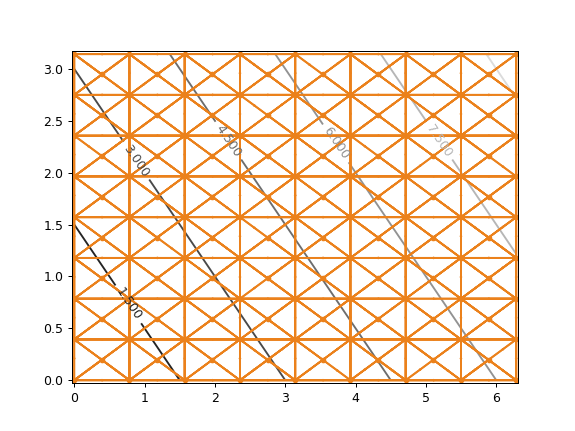

C:\Users\Endres\Desktop\iwt-projects\ddg\ddgclib\_complex.py:3789: UserWarning: The following kwargs were not used by contour: 'color'
  cs = pyplot.contour(xg, yg, Z, cmap='binary_r', color='k')


<IPython.core.display.Javascript object>


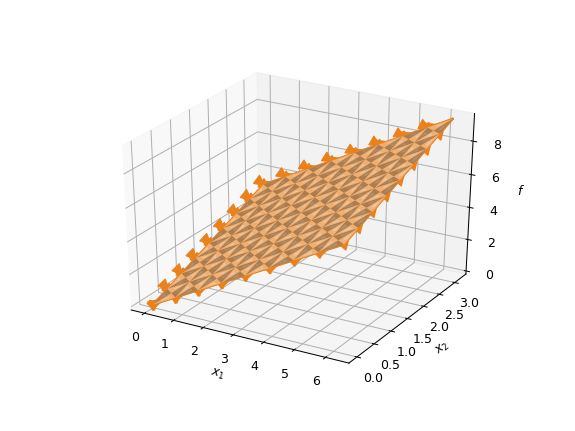

(<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1dc90de7e50>)

In [98]:
domain = [(0.0, 2*np.pi),  # theta
          (0.0, np.pi)  # phi
         ]

def func(x):  # Any arbitrary function can be used to provide direction and compute homologies of a surface
    return np.sum(x)

def sphere(R, theta, phi):  # Parameterisation of the sphere projected from the plane [0, 2pi] x [0, pi]
    return R * np.cos(theta) * np.sin(phi), R * np.sin(theta) * np.sin(phi), R * np.cos(phi)

Theta = np.linspace(0.0, 2*np.pi)  # range of theta
Phi = np.linspace(0.0, np.pi)  # range of phi
HC = Complex(2, domain, sfield=func)
HC.triangulate()
HC.refine_all()
HC.V.process_pools()
"""
NOTE: This code does not lead to a perfect triangulation with ideal incidence. We will need to run the uniform sampling points through QHull instead
"""

domain = [(0.0, 2*np.pi),  # theta
          (0.0, np.pi)  # phi
         ]

HC = Complex(2, domain, sfield=func)
HC.triangulate()
#for i in range(1):
for i in range(3):
    HC.refine_all()
HC.V.process_pools()

F = []
nn = []
for v in HC.V:
    #print(f'v.x_a = {v.x_a}')
    #print(f'v.index = {v.index}')
    theta, phi = v.x_a
    x, y, z = sphere(R, theta, phi)
    F.append(np.array([x, y, z]))
    vnn = []
    for v2 in v.nn:
        vnn.append(v2.index)
        #print(f'v2.index = {v2.index}')
        
    nn.append(vnn)
HC.plot_complex()

<IPython.core.display.Javascript object>


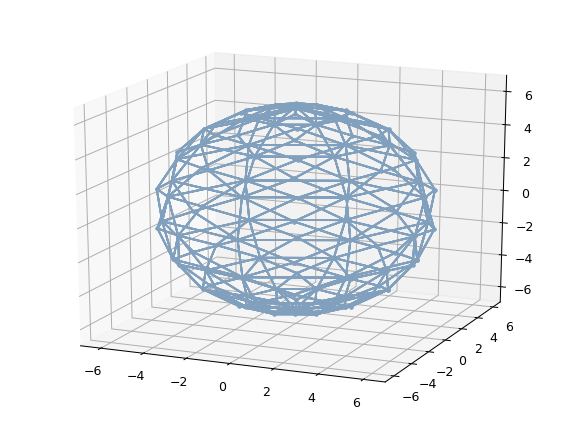

(<Figure size 640x480 with 1 Axes>,
 <ddgclib._complex.Complex at 0x1dc92244a90>)

In [99]:
plot_surface(F, nn)

In [15]:
# Now take, say the point at the top of the sphere.

theta = 0.0
phi = 0.0
x, y, z = sphere(R, theta, phi)
f0 = np.array([x, y, z])
v = HC.V[tuple(f0)]
F, nn = vectorise_vnn(v)
c_outd = curvatures(F, nn)
c_outd

{'F': array([[-0., -0., -1.]]),
 'nn': [[]],
 'n_i': array([-0., -0., -1.]),
 'E_ij': array([[0., 0., 0.]]),
 'E_jk': array([[0., 0., 0.]]),
 'E_ik': array([[0., 0., 0.]]),
 'hat_E_ij': array([[0., 0., 0.]]),
 'L_ij': array([0.]),
 'Varphi_ij': array([0.]),
 'mdp_ij': array([[ 0.,  0., -1.]]),
 'mdp_ik': array([[0., 0., 0.]]),
 'j_k': array([0.]),
 'j_l': array([0.]),
 'Theta_i_jk': array([0.]),
 'Wedge_ij_ik': array([[0., 0., 0.]]),
 'A_ijk': array([0.]),
 'N_ijk': array([[0., 0., 0.]]),
 'N_ijl': array([[0., 0., 0.]]),
 'C_ijk': array([0.]),
 'KNdA_ij': array([[0., 0., 0.]]),
 'HNdA_ij': array([[0., 0., 0.]]),
 'NdA_ij': array([[0., 0., 0.]]),
 'H_ij': array([0.]),
 'V_ijk': array([0.]),
 'i': 0,
 'KNdA_i': array([0., 0., 0.]),
 'HNdA_i': array([0., 0., 0.]),
 'HN_i': 0.0,
 'NdA_i': array([0., 0., 0.]),
 'Omega_i': 6.283185307179586,
 'K': 6.283185307179586,
 'H_i': 0.0,
 'H_ij_sum': 0.0}

In [1]:
"""
NOTE: This code does not lead to a perfect triangulation with ideal incidence. We will need to run the uniform sampling points through QHull instead
"""
def func(x):
    return 0.0

domain = [(0.0, 2*np.pi),  # theta
          (0.0, np.pi)  # phi
         ]

HC = Complex(2, domain, sfield=func)
HC.triangulate()
#for i in range(1):
for i in range(1):
    HC.refine_all()
HC.V.process_pools()

F = []
nn = []
for v in HC.V:
    #print(f'v.x_a = {v.x_a}')
    #print(f'v.index = {v.index}')
    theta, phi = v.x_a
    x, y, z = sphere(R, theta, phi)
    F.append(np.array([x, y, z]))
    vnn = []
    for v2 in v.nn:
        vnn.append(v2.index)
        #print(f'v2.index = {v2.index}')
        
    nn.append(vnn)
    


NameError: name 'np' is not defined